In [46]:
import numpy as np
import pandas as pd
import sklearn
import math
import matplotlib.pyplot as plt
from collections import Counter

In [109]:
csv_data = pd.read_csv("data/dataviz.csv")
csv_data.head()

plat      plng       dlat      dlng         t  \
0  46.517116  6.630342  46.508528  6.627598  11:15:00   
1  46.517116  6.630342  46.521429  6.656347  20:00:00   
2  46.517116  6.630342  46.558792  6.680104  18:15:00   
3  46.520649  6.635173  46.519590  6.634718  18:45:00   
4  46.510731  6.630553  46.515950  6.657525  19:00:00   

                                                road  
0  [311463563, 2940544168, 311463564, 561463459, ...  
1  [311463563, 2940544168, 311463564, 561463459, ...  
2  [311463563, 2940544168, 311463564, 561463459, ...  
3  [2223091605, 3786724165, 3786724164, 302530573...  
4  [3516999773, 3817926827, 567951313, 567951312,...

In [140]:
# Get unique destination locations
dlats = list(csv_data['dlat'])
dlngs = list(csv_data['dlng'])
dcoords = np.array(list(zip(plats,plngs)))

d_count = Counter(list(zip(dlats,dlngs)))

# Number of unique destinations
len(d_count)

528

In [141]:
# Extract pickup locations
plats = list(csv_data['plat'])
plngs = list(csv_data['plng'])
pcoords = np.array(list(zip(plats,plngs)))
pcoords.shape

(2000, 2)

In [144]:
# Get unique pickups locations
unique_pickups = list(Counter(list(zip(plats,plngs))))
len(unique_pickups)

32

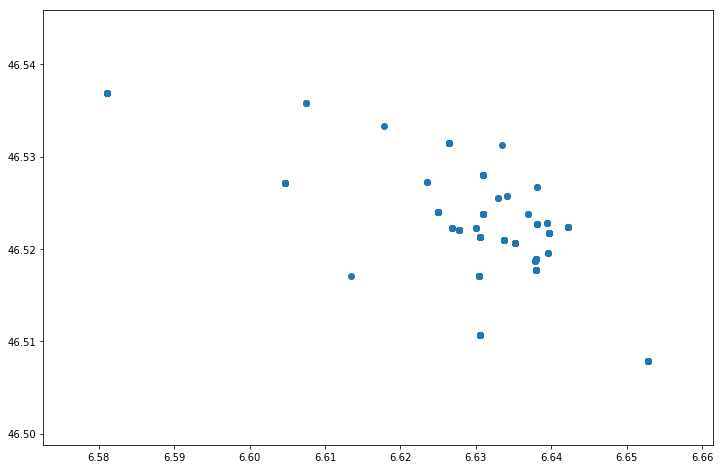

In [133]:
# Plot unique pickup locations
plt.figure(figsize=(12,8))
plt.scatter(plngs,plats)
i = 11
#plt.scatter(unique_coords[i][1],unique_coords[i][0], c='r')
plt.show()

In [135]:
# Prepare dataframe to label each pickup location with the corresponding restaurant
data = [[coord[0], coord[1], nb] for (coord, nb) in count.items()]
data = sorted(data, key=lambda x: x[2], reverse=True)
index = range(len(count))
columns = ['plat', 'plang', 'nb_pickups']

restaurants = pd.Series(['?']*32, index=index)
pickups_df_init = pd.DataFrame(data, index, columns)
pickups_df_init['restaurant'] = restaurants
pickups_df_init.head()

plat     plang  nb_pickups restaurant
0  46.520649  6.635173         995          ?
1  46.517116  6.630342         390          ?
2  46.522014  6.627691         171          ?
3  46.518914  6.637912          81          ?
4  46.521701  6.639626          63          ?

In [148]:
# Label each pickup location with the corresponding restaurant 
pickups_df = pickups_df_init.copy()
pickups_df.loc[1, 'restaurant'] = 'Subway'

pickups_df.loc[4, 'restaurant'] = 'Zooburger (L\'Ours)'
pickups_df.loc[5, 'restaurant'] = 'Zooburger (Mon Loisir)'
pickups_df.loc[6, 'restaurant'] = 'Le Duo Thai & Sushi'
pickups_df.loc[7, 'restaurant'] = 'Burger King'
pickups_df.loc[8, 'restaurant'] = 'Viita Food'

pickups_df.loc[13, 'restaurant'] = 'Bambou Sushi Bar'


pickups_df.loc[27, 'restaurant'] = 'Le Mondial'



pickups_df

plat     plang  nb_pickups              restaurant
0   46.520649  6.635173         995                       ?
1   46.517116  6.630342         390                  Subway
2   46.522014  6.627691         171                       ?
3   46.518914  6.637912          81                       ?
4   46.521701  6.639626          63      Zooburger (L'Ours)
5   46.510731  6.630553          55  Zooburger (Mon Loisir)
6   46.522426  6.642152          36     Le Duo Thai & Sushi
7   46.521329  6.630481          30             Burger King
8   46.523953  6.625008          24              Viita Food
9   46.522719  6.638150          19                       ?
10  46.517671  6.638005          19                       ?
11  46.531433  6.626430          17                       ?
12  46.527087  6.604758          15                       ?
13  46.507833  6.652842          14        Bambou Sushi Bar
14  46.527964  6.630956          12                       ?
15  46.523787  6.630911          12                       ?
16  46.536840  6.581138           7                       ?
17  46.520946  6.633680           6                       ?
18  46.522226  6.626827           5                       ?
19  46.522783  6.639384           3                       ?
20  46.522273  6.630044           3                       ?
21  46.519517  6.639571           3                       ?
22  46.535762  6.607472           3                       ?
23  46.527252  6.623526           3                       ?
24  46.518684  6.637826           3                       ?
25  46.523815  6.636847           2                       ?
26  46.526720  6.638082           2                       ?
27  46.525731  6.634123           2              Le Mondial
28  46.525477  6.632925           2                       ?
29  46.531225  6.633482           1                       ?
30  46.533304  6.617840           1                       ?
31  46.517122  6.613410           1                       ?

In [151]:
# Save pickups dataframe
pickups_df.to_csv('data/unique_pickups.csv', sep=',')

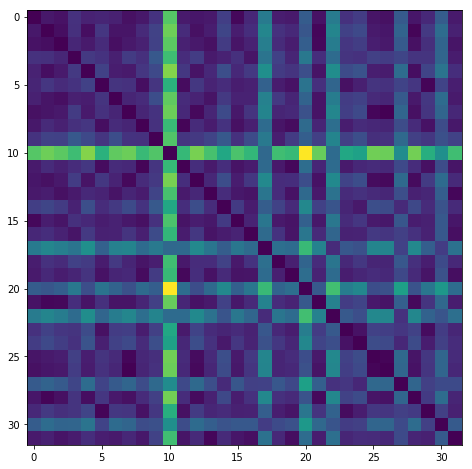

In [145]:
def get_dist(coord1, coord2):
    diff = (coord1[0]-coord2[0], coord1[1]-coord2[1])
    dist = math.sqrt(diff[0]**2 + diff[1]**2)
    return dist

def dist_matrix(coords, log_dist=False):
    dist_mat = np.zeros((len(coords),len(coords)))
    
    for i,coord in enumerate(coords):
        for j,coord in enumerate(coords):
            dist = get_dist(coords[i], coords[j])
            
            if log_dist:
                dist_mat[i,j] = math.log(1+dist)
            else:
                dist_mat[i,j] = dist
            
    return dist_mat

dist_mat = dist_matrix(unique_pickups, log_dist=True)
plt.figure(figsize=(8,8))
plt.imshow(dist_mat)
plt.show()